<a href="https://colab.research.google.com/github/OtavioCarvalho1/Time_Series/blob/main/SHM_ML_Vers%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/OtavioCarvalho1/Time_Series.git

fatal: destination path 'Time_Series' already exists and is not an empty directory.


In [6]:
!pip install statsmodels --upgrade

In [7]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

from sklearn.preprocessing import StandardScaler

from math import sqrt

from statsmodels.tsa.ar_model import AutoReg

from statistics import stdev

# **Extração de Features**

In [8]:
# função para extração de features dos sinais

def get_features(arquivo):
    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)
    peak = np.max(df['Amplitude PZT Sensor']) #1 - peak
    mean = df['Amplitude PZT Sensor'].mean() #2 - mean
    ms = np.square(mean) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = df['Amplitude PZT Sensor'].var() #5 - variance
    std = stdev(df['Amplitude PZT Sensor']) #6 - standard deviation
    skw = skew(df['Amplitude PZT Sensor']) #7 - skewness
    kurt = kurtosis(df['Amplitude PZT Sensor']) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor
    md = pd.DataFrame([peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f])
    return md

In [52]:
# função que coloca ruído no sinal de 80 dB e extrai as features dele

def get_features_noise_80(arquivo):
    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)
    peak = np.max(df['Amplitude PZT Sensor']) #1 - peak
    mean = df['Amplitude PZT Sensor'].mean() #2 - mean
    ms = np.square(mean) #3 - mean square
    rms = np.sqrt(ms) #4 - root mean square
    var = df['Amplitude PZT Sensor'].var() #5 - variance
    std = stdev(df['Amplitude PZT Sensor']) #6 - standard deviation
    skw = skew(df['Amplitude PZT Sensor']) #7 - skewness
    kurt = kurtosis(df['Amplitude PZT Sensor']) #8 - kurtosis
    crest_f = peak/rms #9 - crest factor
    K_f = peak*rms #10 - K-Factor
    md = pd.DataFrame([peak, mean, ms, rms, var, std, skw, kurt, crest_f, K_f])
    
    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 80
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    return pd.DataFrame(y_volts)

**Inserção de Ruído**

In [48]:
def input_noise_80(arquivo):
    names = ['Tempo [s]', 'Amplitude PZT Atuador', 'Amplitude PZT Sensor']
    df = pd.read_csv(arquivo, names=names)
    x_watts = df['Amplitude PZT Sensor']**2
    x_dB = 10 * np.log10(x_watts)
    target_SNR_dB = 80
    sig_avg_watts = np.mean(x_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    noise_avg_db = sig_avg_db - target_SNR_dB
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
    y_volts = df['Amplitude PZT Sensor'] + noise_volts
    return pd.DataFrame(y_volts)

In [53]:
noise = input_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

get_features_noise(noise)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


TypeError: ignored

In [12]:
# 100 kHz

sem_dano_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_100KHz__5ciclos_B3_A3.csv")

dano_1_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_100KHz__5ciclos_B3_A3.csv")

dano_2_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_100KHz__5ciclos_B3_A3.csv")

dano_3_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_100KHz__5ciclos_B3_A3.csv")

dano_4_100 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_100KHz__5ciclos_B3_A3.csv")

# 150 kHz

sem_dano_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_150KHz__5ciclos_B3_A3.csv")

dano_1_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_150KHz__5ciclos_B3_A3.csv")

dano_2_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_150KHz__5ciclos_B3_A3.csv")

dano_3_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_150KHz__5ciclos_B3_A3.csv")

dano_4_150 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_150KHz__5ciclos_B3_A3.csv")

# 200 kHz 

sem_dano_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_200KHz__5ciclos_B3_A3.csv")

dano_1_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_200KHz__5ciclos_B3_A3.csv")

dano_2_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_200KHz__5ciclos_B3_A3.csv")

dano_3_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_200KHz__5ciclos_B3_A3.csv")

dano_4_200 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_200KHz__5ciclos_B3_A3.csv")

# 250 kHz

sem_dano_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_250KHz__5ciclos_B3_A3.csv")

dano_1_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_250KHz__5ciclos_B3_A3.csv")

dano_2_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_250KHz__5ciclos_B3_A3.csv")

dano_3_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_250KHz__5ciclos_B3_A3.csv")

dano_4_250 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_250KHz__5ciclos_B3_A3.csv")

# 300 kHz

sem_dano_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")

dano_1_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn1/PL0402_Dn12_1_300KHz__5ciclos_B3_A3.csv")

dano_2_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn2/PL0402_Dn22_1_300KHz__5ciclos_B3_A3.csv")

dano_3_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn3/PL0402_Dn32_1_300KHz__5ciclos_B3_A3.csv")

dano_4_300 = get_features("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Dn4/PL0402_Dn42_1_300KHz__5ciclos_B3_A3.csv")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


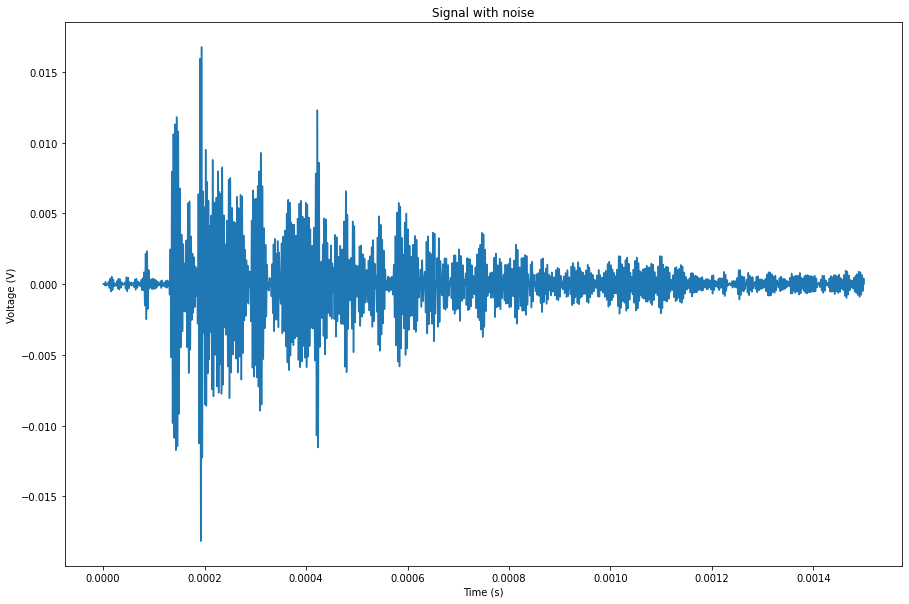

In [43]:
input_noise_80("/content/Time_Series/Dataset-LambWave-Wagner/PL0402_Ref/PL0402_Ref2_1_300KHz__5ciclos_B3_A3.csv")

**Dataset - Sem dano**

In [14]:
frames = [sem_dano_100, sem_dano_150, sem_dano_200, sem_dano_250, sem_dano_300]

features = pd.concat(frames, axis=1)

features

,0,0,0,0,0
0,1.321744e-02,1.123057e-02,1.146453e-02,1.304041e-02,1.676772e-02
1,1.140910e-06,-1.152493e-07,1.573167e-07,7.077133e-08,1.122160e-07
2,1.301676e-12,1.328241e-14,2.474853e-14,5.008582e-15,1.259243e-14
3,1.140910e-06,1.152493e-07,1.573167e-07,7.077133e-08,1.122160e-07
4,4.649339e-06,3.207258e-06,2.539698e-06,3.006508e-06,4.807985e-06
5,2.156233e-03,1.790882e-03,1.593643e-03,1.733929e-03,2.192712e-03
6,-3.724594e-03,7.012031e-04,-3.107291e-03,-1.473612e-03,2.794720e-05
7,7.184161e+00,9.654932e+00,9.862063e+00,1.008534e+01,8.859584e+00
8,1.158500e+04,9.744586e+04,7.287550e+04,1.842612e+05,1.494236e+05
9,1.507991e-08,1.294316e-09,1.803562e-09,9.228872e-10,1.881606e-09


In [11]:
#1 peak amplitude
peak = np.max(df_train['Amplitude PZT Sensor'])

peak

NameError: ignored

In [ ]:
#2 mean
mean = df_train['Amplitude PZT Sensor'].mean()

mean

In [ ]:
#3 mean square
mean_square = np.square(mean)

mean_square

In [ ]:
#4 root mean square
rms = np.sqrt(mean_square)

rms

In [ ]:
#5 variance
df_train['Amplitude PZT Sensor'].var()

In [ ]:
#6 standard deviation
stdev(df_train['Amplitude PZT Sensor'])

In [ ]:
#7 skewness
skew(df_train['Amplitude PZT Sensor'])

In [ ]:
#8 kurtosis
kurtosis(df_train['Amplitude PZT Sensor'])

In [ ]:
#9 crest factor
peak/rms

In [ ]:
#10 K-factor
peak*rms